In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(1)

# Example preparation
* https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

## offset = 0

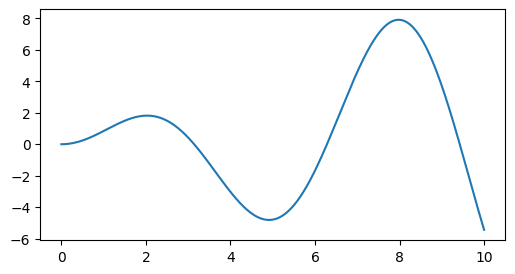

In [2]:
X = np.linspace(0, 10, 1000).reshape(-1, 1)
y = np.squeeze(X*np.sin(X))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y)

fig.savefig("./123_gpr3_1.png")

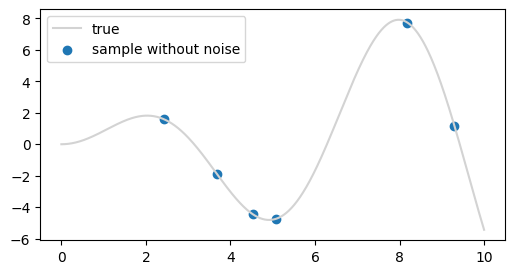

In [3]:
# sample
training_indices = list(rng.choice(np.arange(y.size), size=6, replace=False))
X_train = X[training_indices]
y_train = y[training_indices]

# visualization
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="lightgray", label="true")
ax.scatter(X_train, y_train, label="sample without noise")
ax.legend()

fig.savefig("./123_gpr3_2.png")

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, random_state=0)
gpr.fit(X_train, y_train)
print(gpr.kernel_)

5.02**2 * RBF(length_scale=1.43)


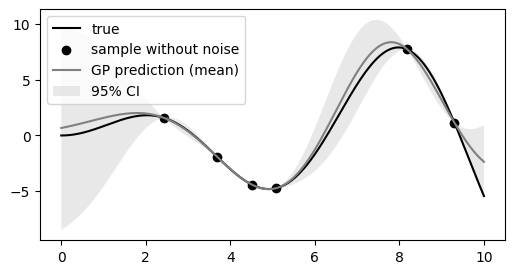

In [5]:
# prediction
y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

# visualization
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="k", label="true")
ax.scatter(X_train, y_train, fc="k", label="sample without noise")

ax.plot(X.ravel(), y_pred_mean, c="0.5", label="GP prediction (mean)")
ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="lightgray", label="95% CI")
ax.legend(loc="upper left")

fig.savefig("./123_gpr3_3.png")

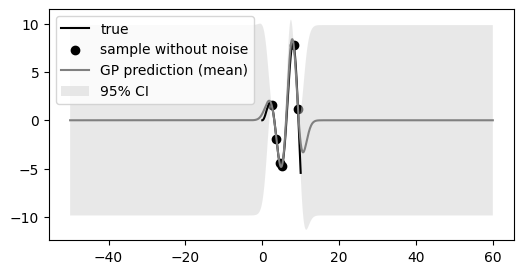

In [6]:
# extreme cases
X_ext = np.linspace(-50, 60, 1101).reshape(-1, 1)

# prediction
y_pred_mean, y_pred_std = gpr.predict(X_ext, return_std=True)

# visualization
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(X, y, c="k", label="true")
ax.scatter(X_train, y_train, fc="k", label="sample without noise")

ax.plot(X_ext.ravel(), y_pred_mean, c="0.5", label="GP prediction (mean)")
ax.fill_between(X_ext.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="lightgray", label="95% CI")
ax.legend(loc="upper left")

fig.savefig("./123_gpr3_7.png")


## offset != 0

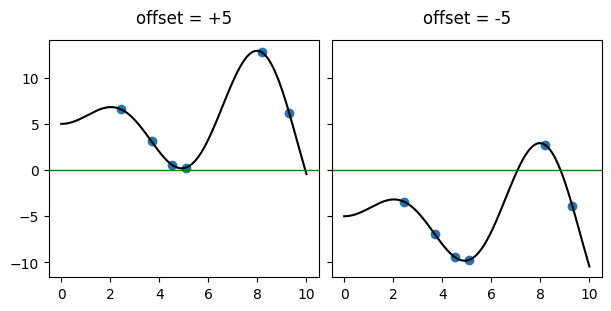

In [7]:
def gen_Xy(offset):
    X = np.linspace(0, 10, 1000).reshape(-1, 1) 
    y = np.squeeze(X*np.sin(X)) + offset
    return X, y

# offset X, y generation
Xp, yp = gen_Xy(5)
Xm, ym = gen_Xy(-5)

# sample
Xp_train, Xm_train = Xp[training_indices], Xm[training_indices]
yp_train, ym_train = yp[training_indices], ym[training_indices]

fig, axs = plt.subplots(ncols=2, figsize=(6, 3), constrained_layout=True, sharex=True, sharey=True)

for ax, X, y, X_train, y_train, title in zip(axs, [Xp, Xm], [yp, ym], 
                                             [Xp_train, Xm_train], [yp_train, ym_train], 
                                             ["offset = +5", "offset = -5"]):
    
    ax.plot(X, y, c="k", label="true")
    ax.scatter(X_train, y_train, label="sample without noise")
    ax.axhline(0, c="g", lw=1)
    ax.set_title(title, pad=12)

fig.savefig("./123_gpr3_4.png")

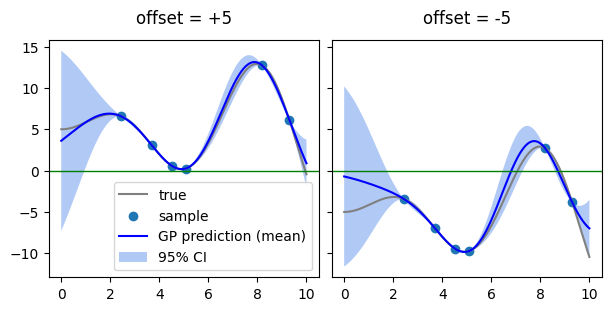

In [8]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

fig, axs = plt.subplots(ncols=2, figsize=(6, 3), constrained_layout=True, sharex=True, sharey=True)

for ax, X, y, X_train, y_train, title in zip(axs, [Xp, Xm], [yp, ym], 
                                             [Xp_train, Xm_train], [yp_train, ym_train], 
                                             ["offset = +5", "offset = -5"]):
    # Gaussian Process
    gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, random_state=0)
    gpr.fit(X_train, y_train)
    
    # prediction
    y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

    ax.plot(X, y, c="0.5", label="true")
    ax.scatter(X_train, y_train, label="sample")
    ax.plot(X.ravel(), y_pred_mean, c="b", label="GP prediction (mean)")
    ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="cornflowerblue", label="95% CI")
    ax.axhline(0, c="g", lw=1)
    ax.set_title(title, pad=12)


axs[0].legend(loc="lower right")
fig.savefig("./123_gpr3_5.png")    

In [9]:
# sample including ends
training_indices += [0, 999]
Xp_train1, Xm_train1 = Xp[training_indices], Xm[training_indices]
yp_train1, ym_train1 = yp[training_indices], ym[training_indices]

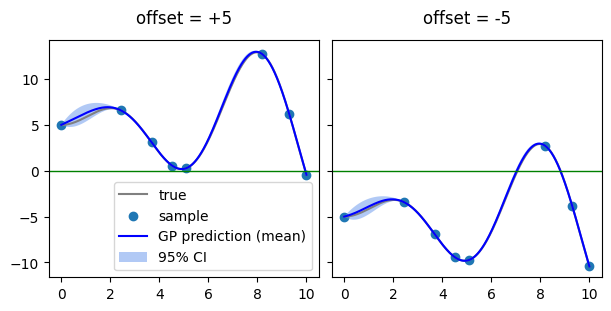

In [10]:
kernel = 1*RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

fig, axs = plt.subplots(ncols=2, figsize=(6, 3), constrained_layout=True, sharex=True, sharey=True)

for ax, X, y, X_train, y_train, title in zip(axs, [Xp, Xm], [yp, ym], 
                                             [Xp_train1, Xm_train1], [yp_train1, ym_train1], 
                                             ["offset = +5", "offset = -5"]):
    # Gaussian Process
    gpr = GaussianProcessRegressor(kernel, n_restarts_optimizer=9, random_state=0)
    gpr.fit(X_train, y_train)
    
    # prediction
    y_pred_mean, y_pred_std = gpr.predict(X, return_std=True)

    ax.plot(X, y, c="0.5", label="true")
    ax.scatter(X_train, y_train, label="sample")
    ax.plot(X.ravel(), y_pred_mean, c="b", label="GP prediction (mean)")
    ax.fill_between(X.ravel(), y_pred_mean-1.96*y_pred_std, y_pred_mean+1.96*y_pred_std, alpha=0.5, fc="cornflowerblue", label="95% CI")
    ax.axhline(0, c="g", lw=1)
    ax.set_title(title, pad=12)


axs[0].legend(loc="lower right")
fig.savefig("./123_gpr3_6.png")  